In [116]:
import pandas as pd

csv_file = pd.read_csv("../data/Ramps_0_with_score.csv")
csv_file.head()

,Unnamed: 0,FID,ObjectID,ObjectID_1,CREEC_Type,CREEC_Posi,RAMP_MATL,THR_WIDTH,LAND_EXIST,LANDING_SL,...,Bearing,Dwy,RAMP_ID_1,Ramp_ID_d,Longitude,Latitude,address,postal,neighborhood,score_1
0,0,1176,1,1,Diagonal,Diagonal,Portland Cement Concrete,5.0,Yes,4.6,...,111.498126,,904.2,904.2,-71.073295,42.352009,"Brooks Brothers, 46, Newbury Street, Back Bay,...",02116,Back Bay,82.400000
1,1,1211,2,2,Diagonal,Diagonal,Portland Cement Concrete,5.0,Yes,0.7,...,204.869440,,2233.3,2233.3,-71.075643,42.351405,"110, Newbury Street, Back Bay, Boston, Suffolk...",02116,Back Bay,92.800000
2,2,1212,3,3,Diagonal,Diagonal,Portland Cement Concrete,5.0,Yes,2.9,...,296.326186,,2233.4,2233.4,-71.075704,42.351512,"Cole Haan, 109, Newbury Street, Back Bay, Bost...",02116,Back Bay,66.341154
3,3,1213,4,4,Diagonal,Diagonal,Portland Cement Concrete,5.0,Yes,1.1,...,23.302030,,2233.1,2233.1,-71.075548,42.351564,"103-105, Newbury Street, Back Bay, Boston, Suf...",02116,Back Bay,95.975000
4,4,1214,5,5,Diagonal,Diagonal,Portland Cement Concrete,4.5,Yes,2.1,...,24.348423,,904.1,904.1,-71.073388,42.352145,"39-47, Newbury Street, Back Bay, Boston, Suffo...",02116,Back Bay,87.750000


In [117]:
import folium
from folium import plugins, Map


base_map = Map(location=[42.361145, -71.057083],zoom_start = 30)



In [118]:
low_score = csv_file[csv_file["score_1"] <20]

for point in range(0, len(low_score)):
    folium.CircleMarker([low_score.iloc[point]['Latitude'], low_score.iloc[point]['Longitude']],color = 'red', fill = True, fill_color = 'red').add_to(base_map)

base_map.save("../maps/ramps_score/low_ramp_score.html")

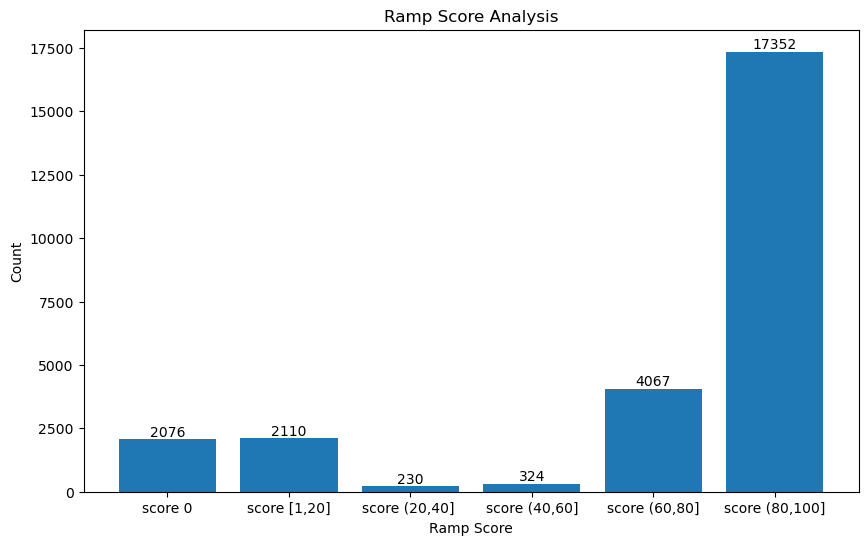

In [119]:
score_0 = len(csv_file[csv_file["score_1"] ==0])
score_20 = len(csv_file[(csv_file["score_1"] >0) & (csv_file["score_1"] <=20)])
score_40 = len(csv_file[(csv_file["score_1"] >20) & (csv_file["score_1"] <=40)])
score_60 = len(csv_file[(csv_file["score_1"] >40) & (csv_file["score_1"] <=60)])
score_80 = len(csv_file[(csv_file["score_1"] >60) & (csv_file["score_1"] <=80)])
score_100 = len(csv_file[(csv_file["score_1"] >80) & (csv_file["score_1"] <=100)])

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt1=plt.bar(['score 0','score [1,20]','score (20,40] ','score (40,60]','score (60,80]','score (80,100]'],[score_0,score_20,score_40,score_60,score_80,score_100])
plt.bar_label(plt1)
plt.xlabel("Ramp Score")
plt.ylabel('Count')
plt.title("Ramp Score Analysis")
plt.savefig("../graphs/ramps_score/RampScore.pdf")

In [120]:
low_score = low_score.groupby("neighborhood")['ObjectID'].count()
low_score.sort_values(ascending=False)

neighborhood
Dorchester             552
West Roxbury           358
Roxbury                346
Hyde Park              337
South Boston           291
Roslindale             245
East Boston            233
Mattapan               223
Jamaica Plain          209
Beacon Hill            184
Brighton               181
South End              151
Charlestown            136
Back Bay               121
Downtown Boston        114
Allston                 98
Fenway / Kenmore        84
North End               83
Mission Hill            78
Bay Village             46
West End                36
Dock Square             28
Chinatown               24
Cambridgeport           14
Saint Mary's Street      4
Riverdale                3
Chestnut Hill            2
Copley Bridge            1
Mountfort Street         1
Ashmont                  1
Baker Street             1
Beaconsfield             1
Name: ObjectID, dtype: int64

In [121]:
csv_file.groupby('LANDING_CO')['FID'].count()

LANDING_CO
                                                                        6117
Excellent (Like new)                                                   14770
Fair (Minor/Hairline damage with no impact to accessibility)            4897
Poor (Panel is damaged and affecting functionality- to be replaced)      375
Name: FID, dtype: int64

In [122]:
landing_condition = csv_file[csv_file["LANDING_CO"] == "Poor (Panel is damaged and affecting functionality- to be replaced)"]
landing_condition = landing_condition.groupby("neighborhood")['ObjectID'].count()
landing_condition.sort_values(ascending=False)

neighborhood
Roxbury             62
Dorchester          56
Jamaica Plain       37
West Roxbury        30
Hyde Park           27
South Boston        24
Roslindale          17
South End           14
Beacon Hill         12
Mattapan            12
Mission Hill        11
Brighton             9
Charlestown          9
North End            9
Allston              7
East Boston          7
Fenway / Kenmore     7
Back Bay             5
Chinatown            5
West End             5
Dock Square          4
Downtown Boston      2
Bay Village          2
Riverdale            1
Cambridgeport        1
Name: ObjectID, dtype: int64

In [123]:
landing_condition_excellent = csv_file[csv_file["LANDING_CO"] == "Excellent (Like new)"]
landing_condition_excellent = landing_condition_excellent.groupby("neighborhood")['ObjectID'].count()
landing_condition_excellent.sort_values(ascending=False)

neighborhood
Dorchester                         2013
Roxbury                            1710
South Boston                       1366
West Roxbury                       1038
Hyde Park                           906
Brighton                            846
Roslindale                          829
Mattapan                            721
Jamaica Plain                       674
South End                           649
East Boston                         613
Charlestown                         587
Fenway / Kenmore                    567
Allston                             492
Downtown Boston                     351
Back Bay                            279
North End                           238
Mission Hill                        229
West End                            178
Beacon Hill                         142
Bay Village                         108
Chinatown                            59
Cambridgeport                        50
Dock Square                          46
Chestnut Hill              

In [124]:
csv_file.groupby('CROSS_')['FID'].count()

CROSS_
                                         2
Crosswalk aligned                    11650
Crosswalk misaligned                   903
Crosswalk misaligned (apex issue)     2024
Misaligned Crosswalk                   481
No Crosswalk                         11099
Name: FID, dtype: int64

In [125]:

csv_file.groupby('SAFE_ZONE_')['FID'].count()

SAFE_ZONE_
                                                   2320
Excellent (pavement in good condition)            13351
Fair (pavement in fair condition)                  9640
Poor (pavement in poor/inaccessible condition)      848
Name: FID, dtype: int64

In [126]:
csv_file.groupby('RAMP_COND')['FID'].count()


RAMP_COND
                                                                        4134
Excellent (Like new)                                                   15119
Fair (Minor/Hairline damage with no impact to accessibility)            6241
Poor (Panel is damaged and affecting functionality- to be replaced)      665
Name: FID, dtype: int64

In [127]:
csv_file.groupby('ADA_Compli')['FID'].count()

ADA_Compli
Compliant                   3289
Not Compliant              20809
Not Compliant - Missing     2061
Name: FID, dtype: int64

In [128]:

import folium
from folium import plugins, Map
not_compliant = csv_file[csv_file['ADA_Compli']=='Not Compliant']

base_map_2 = Map(location=[42.361145, -71.057083],zoom_start = 30)
for point in range(0, len(not_compliant)):
    folium.CircleMarker([not_compliant.iloc[point]['Latitude'], not_compliant.iloc[point]['Longitude']],color = 'yellow', fill = True, fill_color = 'yellow').add_to(base_map_2)

base_map_2.save("../maps/ramps_score/ada_not_compliant.html")
not_compliant.count()

Unnamed: 0      20809
FID             20809
ObjectID        20809
ObjectID_1      20809
CREEC_Type      20809
CREEC_Posi      20809
RAMP_MATL       20809
THR_WIDTH       20809
LAND_EXIST      20809
LANDING_SL      20809
LANDING_CO      20809
APRON_SL        20809
LFLARE_SL       20809
DWP_MATL        20809
DWP_COND        20809
GUTTER_SL       20809
GUTTER_CS       20809
LIP             20809
CROSS_          20809
RFLARE_SL       20809
SAFE_ZONE_      20809
RAMP_OBSTR      20809
FLARE_OBST      20809
APRON_CROS      20809
Crosswalk_      20809
RAMP_COND       20809
ADA_Compli      20809
Photo           20809
ObjectID_3      20809
Failure_Ty      20809
Failure_La      20809
NEAR_FID        20809
NEAR_DIST       20809
INT_ID          20809
I_NEARDIST      20809
I_NEARFID       20809
PARC_ID         20809
AT_INT          20809
NEAR_ANGLE      20809
Bearing         20809
Dwy             20809
RAMP_ID_1       20809
Ramp_ID_d       20809
Longitude       20809
Latitude        20809
address   

In [129]:
# neighbourhood_tracker = not_compliant.groupby("Street")["id"].count()
# neighbourhood_tracker
# import matplotlib.pyplot as plt
# plt.figure(figsize=(90,40))
# plt1= plt.bar(neighbourhood_tracker.index,neighbourhood_tracker)
# plt.bar_label(plt1)
# plt.xlabel("Street")
# plt.ylabel('Count')
# plt.title("ADA not compliant Counts in each neighbourhood")
# # plt.savefig("./÷ADA_Compliance_Failed.pdf")

# #plt.close()

In [130]:
not_compliant_neighbourhood = not_compliant.groupby("neighborhood")['FID'].value_counts(ascending=False)
# not_compliant_neighbourhood

In [131]:
not_compliant_neighbourhood.sort_values(ascending=False)

neighborhood     FID  
Allston          3        1
Roslindale       20771    1
                 20820    1
                 20814    1
                 20791    1
                         ..
Downtown Boston  2512     1
                 2511     1
                 2510     1
                 2509     1
Woodmere         3329     1
Name: FID, Length: 20807, dtype: int64

In [132]:
not_compliant_neighbourhood = pd.DataFrame(not_compliant_neighbourhood)

In [133]:
neighbor_count = csv_file[csv_file['neighborhood']=='Roslindale']
len(neighbor_count)

1431

In [134]:
ramps_e = csv_file[csv_file['RAMP_COND']=='Excellent (Like new)']
ramps_e = ramps_e.groupby("neighborhood")['ObjectID'].count()
ramps_e.sort_values(ascending=False)

neighborhood
Dorchester                         1980
Roxbury                            1721
South Boston                       1458
West Roxbury                       1072
Brighton                            897
Hyde Park                           896
Roslindale                          799
Jamaica Plain                       747
Mattapan                            665
South End                           659
East Boston                         643
Charlestown                         626
Fenway / Kenmore                    600
Allston                             513
Downtown Boston                     370
Back Bay                            297
North End                           251
Mission Hill                        231
West End                            186
Beacon Hill                         147
Bay Village                         112
Chinatown                            61
Cambridgeport                        55
Dock Square                          53
Chestnut Hill              

In [135]:
ramps_f = csv_file[csv_file['RAMP_COND']=='Fair (Minor/Hairline damage with no impact to accessibility)']
ramps_f = ramps_f.groupby("neighborhood")['ObjectID'].count()
ramps_f.sort_values(ascending=False)


neighborhood
Dorchester             932
Roxbury                608
Mattapan               522
South Boston           435
Hyde Park              407
East Boston            396
Roslindale             330
Charlestown            289
Brighton               274
South End              254
West Roxbury           235
Back Bay               206
Jamaica Plain          198
Fenway / Kenmore       181
Downtown Boston        174
North End              161
Beacon Hill            140
Allston                138
West End               108
Mission Hill           102
Bay Village             50
Chinatown               28
Dock Square             27
Cambridgeport           22
Chestnut Hill            8
Riverdale                3
Downtown Crossing        3
Euston Street            2
Essex Street             2
Financial District       1
Saint Mary's Street      1
Beacon Street            1
Ivy Street               1
Villa Victoria           1
Ashmont                  1
Name: ObjectID, dtype: int64

In [136]:

ramps_p = csv_file[csv_file['RAMP_COND']=='Poor (Panel is damaged and affecting functionality- to be replaced)']
ramps_p = ramps_p.groupby("neighborhood")['ObjectID'].count()
ramps_p.sort_values(ascending=False)

neighborhood
Dorchester          112
Roxbury             106
Hyde Park            79
Roslindale           56
South Boston         47
Jamaica Plain        40
West Roxbury         34
Mattapan             29
Charlestown          28
South End            20
Brighton             14
Back Bay             13
North End            11
Mission Hill         11
Beacon Hill          10
East Boston           9
Downtown Boston       8
Allston               7
Fenway / Kenmore      7
Chinatown             6
Dock Square           5
West End              5
Bay Village           4
Riverdale             2
Cambridgeport         2
Name: ObjectID, dtype: int64

In [137]:
import folium
from folium import plugins, Map
# not_compliant = csv_file[csv_file['ADA_Compli']=='Not Compliant']

def color_cluster(index):
    if index == "Excellent (Like new)":
        return 'green'
    elif index == "Fair (Minor/Hairline damage with no impact to accessibility)":
        return 'blue'
    elif index == "Poor (Panel is damaged and affecting functionality- to be replaced)": 
        return 'red'

base_map_2 = Map(location=[42.361145, -71.057083],zoom_start = 30)
for point in range(0, len(csv_file)):
    folium.CircleMarker([csv_file.iloc[point]['Latitude'], csv_file.iloc[point]['Longitude']],color = color_cluster(csv_file.iloc[point]['RAMP_COND']), fill = True, fill_color = color_cluster(csv_file.iloc[point]['RAMP_COND'])).add_to(base_map_2)

base_map_2.save("../maps/ramps_score/combined_ramp_conditions_regions.html")
# not_compliant.count()

In [138]:
demogrpahics = pd.read_csv("./combined_demographics.csv")

In [139]:
demogrpahics.head

<bound method NDFrame.head of     Unnamed: 0                     Name  Total Population  Total Housing  \
0            0                  Allston              7592           3823   
1            1                 Back Bay             28634          18365   
2            2              Bay Village             10850           5076   
3            3                 Brighton             60821          27143   
4            4              Charlestown             16439           8648   
5            5               Dorchester             69695          27507   
6            6              East Boston             40517          15857   
7            7                   Fenway             27138           9243   
8            8           Harbor Islands               535              0   
9            9                Hyde Park             16585           6592   
10          10            Jamaica Plain             42251          18844   
11          11         Leather District              5902 

In [140]:
demogrpahics.columns

Index(['Unnamed: 0', 'Name', 'Total Population', 'Total Housing',
       'Total Children', 'Total Disability', 'Total Older adults',
       'Total Low Income', 'Total Medical Illness'],
      dtype='object')

In [141]:
total_count = csv_file.groupby('neighborhood')['ObjectID'].count()
total_count['Allston']

798

In [142]:
demogrpahics['TotalRampsCount'] = demogrpahics['Name'].apply(lambda x: total_count[x] if x in total_count else 0)

In [143]:
demogrpahics['TotalRampsCount']

0      798
1      620
2      210
3     1425
4     1047
5     3575
6     1320
7        0
8        0
9     1626
10    1203
11       2
12       0
13    1383
14     446
15     466
16    1431
17    2709
18    2280
19       0
20    1054
21     338
22    1886
Name: TotalRampsCount, dtype: int64

In [144]:
demogrpahics['ExcellentRamp'] = demogrpahics['Name'].apply(lambda x: ramps_e[x] if x in ramps_e else 0)
demogrpahics['FairRamp'] = demogrpahics['Name'].apply(lambda x: ramps_f[x] if x in ramps_f else 0)
demogrpahics['PoorRamp'] = demogrpahics['Name'].apply(lambda x: ramps_p[x] if x in ramps_p else 0)


In [145]:
# demogrpahics['RampDensity'] =  demogrpahics[['Total Population','TotalRampsCount']].apply(lambda x,y : x/y if y!=0 else 0)
demogrpahics['RampDensity'] = demogrpahics[['Total Population','TotalRampsCount']].apply(lambda x : x['TotalRampsCount']/x['Total Population'] if x['Total Population'] != 0 else 0, axis=1)


In [146]:
demogrpahics

,Unnamed: 0,Name,Total Population,Total Housing,Total Children,Total Disability,Total Older adults,Total Low Income,Total Medical Illness,TotalRampsCount,ExcellentRamp,FairRamp,PoorRamp,RampDensity
0,0,Allston,7592,3823,173,400,144,3300,2831.85,798,513,138,7,0.105111
1,1,Back Bay,28634,18365,1686,1892,3759,5316,11842.96,620,297,206,13,0.021653
2,2,Bay Village,10850,5076,1249,1122,1711,3929,4292.93,210,112,50,4,0.019355
3,3,Brighton,60821,27143,4244,5502,5847,17067,23936.80,1425,897,274,14,0.023429
4,4,Charlestown,16439,8648,3301,1535,1811,4157,6461.47,1047,626,289,28,0.063690
5,5,Dorchester,69695,27507,17424,9819,6535,22749,25010.76,3575,1980,932,112,0.051295
6,6,East Boston,40517,15857,8665,5180,4147,13698,14824.60,1320,643,396,9,0.032579
7,7,Fenway,27138,9243,453,1240,496,6681,10080.74,0,0,0,0,0.000000
8,8,Harbor Islands,535,0,0,179,12,349,230.53,0,0,0,0,0.000000
9,9,Hyde Park,16585,6592,3256,2117,2219,2683,6412.46,1626,896,407,79,0.098040


In [147]:
# demogrpahics.sort_values(by='RampDensity', inplace=True)

In [148]:
demogrpahics['RampDensity_total_ramps_against_disability'] = demogrpahics[['Total Disability','TotalRampsCount']].apply(lambda x : x['TotalRampsCount']/x['Total Disability'] if x['Total Disability'] != 0 else 0, axis=1)
demogrpahics['RampDensity_poor_ramps_against_disability'] = demogrpahics[['Total Disability','PoorRamp']].apply(lambda x : x['PoorRamp']/x['Total Disability'] if x['Total Disability'] != 0 else 0, axis=1)
demogrpahics['RampDensity_excellent_ramps_against_disability'] = demogrpahics[['Total Disability','ExcellentRamp']].apply(lambda x : x['ExcellentRamp']/x['Total Disability'] if x['Total Disability'] != 0 else 0, axis=1)


In [149]:
demogrpahics['RatioPoorRamp'] = demogrpahics[['PoorRamp','TotalRampsCount']].apply(lambda x : x['PoorRamp']/x['TotalRampsCount'] if x['TotalRampsCount'] != 0 else 0, axis=1)
demogrpahics['RatioExcellentRamp'] = demogrpahics[['ExcellentRamp','TotalRampsCount']].apply(lambda x : x['ExcellentRamp']/x['TotalRampsCount'] if x['TotalRampsCount'] != 0 else 0, axis=1)
demogrpahics['RatioFairRamp'] = demogrpahics[['FairRamp','TotalRampsCount']].apply(lambda x : x['FairRamp']/x['TotalRampsCount'] if x['TotalRampsCount'] != 0 else 0, axis=1)


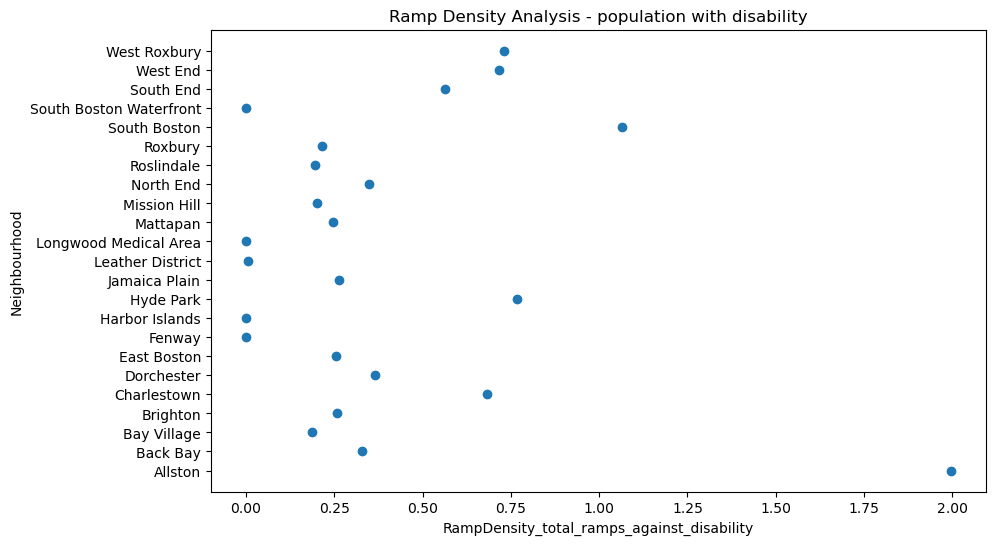

In [150]:
plt.figure(figsize=(10,6))
plt1 = plt.scatter(demogrpahics['RampDensity_total_ramps_against_disability'],demogrpahics['Name'])
# plt.bar_label(plt1)
plt.xlabel("RampDensity_total_ramps_against_disability")
plt.ylabel('Neighbourhood')
plt.title("Ramp Density Analysis - population with disability")
plt.savefig("../graphs/ramps_score/Neighbourhood-demographics.pdf")

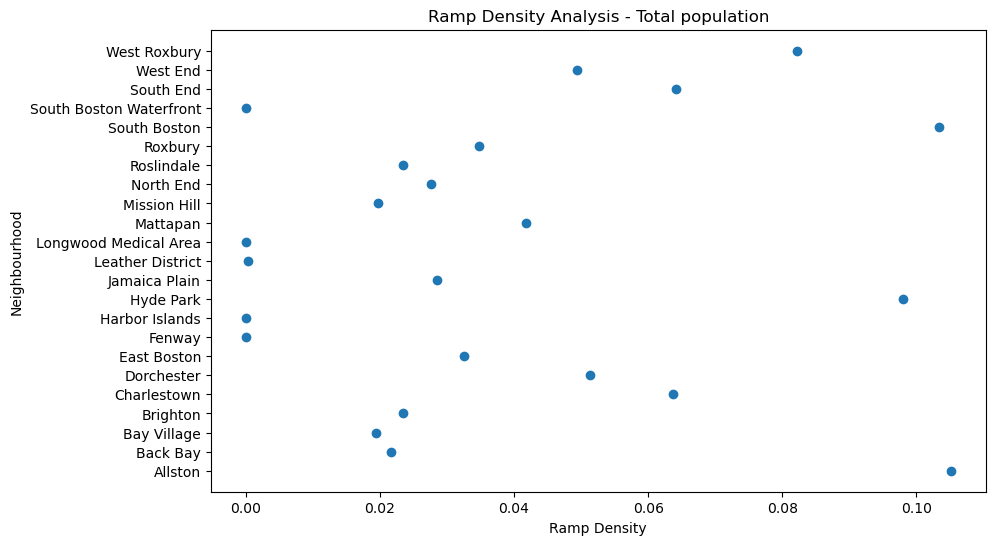

In [151]:
plt.figure(figsize=(10,6))
plt1 = plt.scatter(demogrpahics['RampDensity'],demogrpahics['Name'])
# plt.bar_label(plt1)
plt.xlabel("Ramp Density")
plt.ylabel('Neighbourhood')
plt.title("Ramp Density Analysis - Total population")
plt.savefig("../graphs/ramps_score/RampDensity-demographics.pdf")

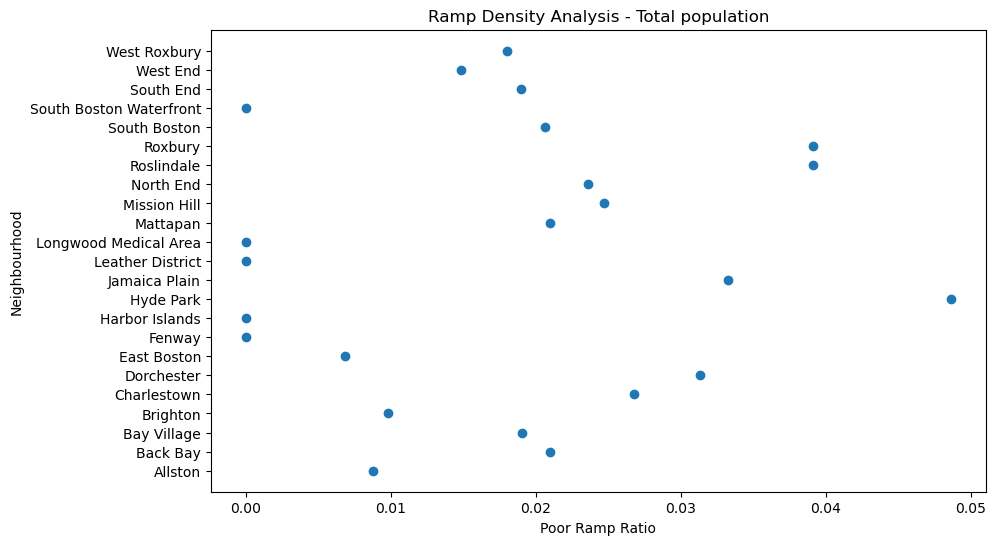

In [152]:
plt.figure(figsize=(10,6))
plt1 = plt.scatter(demogrpahics['RatioPoorRamp'],demogrpahics['Name'])
# plt.bar_label(plt1)
plt.xlabel("Poor Ramp Ratio")
plt.ylabel('Neighbourhood')
plt.title("Ramp Density Analysis - Total population")
plt.savefig("../graphs/ramps_score/RampPoor-demographics.pdf")

In [153]:
demogrpahics.columns

Index(['Unnamed: 0', 'Name', 'Total Population', 'Total Housing',
       'Total Children', 'Total Disability', 'Total Older adults',
       'Total Low Income', 'Total Medical Illness', 'TotalRampsCount',
       'ExcellentRamp', 'FairRamp', 'PoorRamp', 'RampDensity',
       'RampDensity_total_ramps_against_disability',
       'RampDensity_poor_ramps_against_disability',
       'RampDensity_excellent_ramps_against_disability', 'RatioPoorRamp',
       'RatioExcellentRamp', 'RatioFairRamp'],
      dtype='object')

In [155]:
poor_rampDensity_disability_pop = demogrpahics.sort_values('RampDensity_poor_ramps_against_disability', ascending=False)

prd = poor_rampDensity_disability_pop[['Name','RatioExcellentRamp', 'RampDensity_poor_ramps_against_disability',
       'RampDensity_excellent_ramps_against_disability']].head()

prd.to_csv('../tables/poorRD_disability_population.csv')

In [156]:
excellent_rampDensity_disability_pop = demogrpahics.sort_values('RampDensity_excellent_ramps_against_disability', ascending=False)

erd = excellent_rampDensity_disability_pop[['Name', 'RatioPoorRamp', 'RampDensity_poor_ramps_against_disability',
       'RampDensity_excellent_ramps_against_disability']].head()

erd.to_csv('../tables/excellentRD_disability_population.csv')

In [157]:
# demogrpahics.sort_values(by='RatioPoorRamp', inplace=True)

poorRampsRatio = demogrpahics.sort_values('RatioPoorRamp', ascending=False)

pprr = poorRampsRatio[['Name', 'PoorRamp','TotalRampsCount','RatioPoorRamp', 'RampDensity_poor_ramps_against_disability',
       'RampDensity_excellent_ramps_against_disability']].head()

pprr.to_csv('../tables/poorRampRatio.csv')

In [158]:
fairRampsRatio = demogrpahics.sort_values('RatioFairRamp', ascending=False)

frr = fairRampsRatio[['Name', 'FairRamp','TotalRampsCount','RatioFairRamp','RampDensity_poor_ramps_against_disability',
       'RampDensity_excellent_ramps_against_disability']].head()

frr.to_csv('../tables/fairRamp.csv')

In [159]:
excellentRampsRatio = demogrpahics.sort_values('RatioExcellentRamp', ascending=False)

err = excellentRampsRatio[['Name', 'ExcellentRamp','TotalRampsCount','RatioExcellentRamp','RampDensity_poor_ramps_against_disability',
       'RampDensity_excellent_ramps_against_disability']].head(6)

err.to_csv('../tables/excellent_ramps.csv')

In [104]:
demogrpahics.columns

Index(['Name', 'Total Population', 'Total Housing', 'Total Children',
       'Total Disability', 'Total Older adults', 'Total Low Income',
       'Total Medical Illness', 'TotalRampsCount', 'ExcellentRamp', 'FairRamp',
       'PoorRamp', 'RampDensity', 'RampDensity_total_ramps_against_disability',
       'RatioPoorRamp', 'RatioExcellentRamp', 'RatioFairRamp',
       'RampDensity_poor_ramps_against_disability',
       'RampDensity_excellent_ramps_against_disability'],
      dtype='object')

In [107]:
totalPopRampsRatio = demogrpahics.sort_values('Total Population', ascending=False)

totalPopRampsRatio[['Name','Total Population' ,'ExcellentRamp','PoorRamp','RatioExcellentRamp','RampDensity_poor_ramps_against_disability',
       'RampDensity_excellent_ramps_against_disability']].head(6)

,Name,Total Population,ExcellentRamp,PoorRamp,RatioExcellentRamp,RampDensity_poor_ramps_against_disability,RampDensity_excellent_ramps_against_disability
17,Roxbury,77812,1721,106,0.635290,0.008405,0.136468
5,Dorchester,69695,1980,112,0.553846,0.011406,0.201650
16,Roslindale,60973,799,56,0.558351,0.007686,0.109662
3,Brighton,60821,897,14,0.629474,0.002545,0.163032
10,Jamaica Plain,42251,747,40,0.620948,0.008753,0.163457
6,East Boston,40517,643,9,0.487121,0.001737,0.124131


In [108]:
totalchildRampsRatio = demogrpahics.sort_values('Total Children', ascending=False)

totalchildRampsRatio[['Name','Total Children' ,'ExcellentRamp','PoorRamp','RatioExcellentRamp','RampDensity_poor_ramps_against_disability',
       'RampDensity_excellent_ramps_against_disability']].head(6)

,Name,Total Children,ExcellentRamp,PoorRamp,RatioExcellentRamp,RampDensity_poor_ramps_against_disability,RampDensity_excellent_ramps_against_disability
17,Roxbury,19517,1721,106,0.635290,0.008405,0.136468
5,Dorchester,17424,1980,112,0.553846,0.011406,0.201650
16,Roslindale,13324,799,56,0.558351,0.007686,0.109662
13,Mattapan,8859,665,29,0.480839,0.005174,0.118644
6,East Boston,8665,643,9,0.487121,0.001737,0.124131
10,Jamaica Plain,7300,747,40,0.620948,0.008753,0.163457


In [109]:
totalDisabilityRampsRatio = demogrpahics.sort_values('Total Disability', ascending=False)

totalDisabilityRampsRatio[['Name','Total Disability' ,'ExcellentRamp','PoorRamp','RatioExcellentRamp','RampDensity_poor_ramps_against_disability',
       'RampDensity_excellent_ramps_against_disability']].head(6)

,Name,Total Disability,ExcellentRamp,PoorRamp,RatioExcellentRamp,RampDensity_poor_ramps_against_disability,RampDensity_excellent_ramps_against_disability
17,Roxbury,12611,1721,106,0.635290,0.008405,0.136468
5,Dorchester,9819,1980,112,0.553846,0.011406,0.201650
16,Roslindale,7286,799,56,0.558351,0.007686,0.109662
13,Mattapan,5605,665,29,0.480839,0.005174,0.118644
3,Brighton,5502,897,14,0.629474,0.002545,0.163032
6,East Boston,5180,643,9,0.487121,0.001737,0.124131
